<a href="https://colab.research.google.com/github/safranco8/Mentoria2022-G2/blob/main/TP3_aprendizaje_supervisado_20220910.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Predicción de Ventas en las Sucursales de una Cadena de Supermercados





# Trabajo Práctico N°3: Aprendizaje Supervisado

## Introducción

En los prácticos 1 y 2 se analizaron las series originales y se les realizaron diversas transformaciones. 
A partir de las series preprocesadas, en este práctico se persigue el objetivo general de entrenar  modelos predictivos y comparar su desempeño. 

En esta introducción se describen muy brevemente algunas metodologías propias de series temporales que serán necesarias para responder las consignas. La idea es solo introducirnos en lo mínimo necesario para adaptar lo visto en _Introducción al Aprendizaje Automático_ y _Aprendizaje Supervisado_ al caso de Series Temporales. Se proveen varios links al blog: [machinelearningmastery.com](https://machinelearningmastery.com/) de Jason Brownlee, porque contiene explicaciones muy claras y bastante código de Python que seguramente les será muy útil.

### División en conjuntos de entrenamiento y test

Como se estudia en la materia _Introducción al Aprendizaje Automático_, para entrenar modelos y seleccionar cuál es el más adecuado, se debe __particionar los datos (ejemplos) en conjuntos de entrenamiento, validación y test__; o bien en conjuntos de entrenamiento y test, si se emplea validación cruzada. La práctica habitual para construir dichos subconjuntos, es por medio de selección aleatoria, a fines de garantizar que los mismos provengan de una misma distribución y a su vez evitar el sobreajuste. En el caso de datos de series temporales, dicha estrategia no resulta adecuada porque un muestreo aleatorio rompe el ordenamiento de los datos por lo que se pierde la autocorrelación que justamente es lo que le dá sentido al análisis. Por lo tanto, para dividir los conjuntos de entrenamiento y test se debe acudir a otras metodologías. 

Existen dos procedimientos de partición que son los más empleados para datos de series de tiempo. La forma más secilla consiste en particionar el dataset en un punto fijo del tiempo de modo tal que los datos mas antiguos se usan para entrenar los modelos y los mas nuevos para test([Train-Test Split](https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/)). Otro procedimiento, denominado en el mismo blog como [Walk-Forward Validation](https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/), consiste en realizar cortes recursivos, por ejemplo a partir de una ventana temporal inicial tomar los $s$ primeros datos para pronosticar el valor de la variable en $s+1$, luego tomar los $s+1$ primeros datos para estimar el valor en $s+2$, etc (debe notarse que el conjunto que se usa para entrenamiento crece en cada paso). Existe también una variación del segundo procedimiento en la que se mantiene fijo el tamaño del conjunto de entrenamiento, por ejemplo se usan los primeros $s$ datos para pronosticar el valor en $s+1$ como antes, pero en el siguiente paso se dropea la primera observación y se emplean los datos desde la observación 2 hasta la $s+1$ para pronosticar el valor en $s+2$ (entonces en cada paso el conjunto de entrenamiento esá formado por $s$ datos). 

### Entrenamiento de modelos

Exploraremos algunos modelos propios de la literatura estadística pero empleando una metodología de entrenamiento mas ligada a aprendizaje automático.
En la literatura estadística de Series Temporales se trabaja tanto con estimaciones puntuales (el pronóstico es un único número) como en la construcción de bandas de pronóstico (un rango entre los que se espera que esté el valor pronosticado con cierta probabilidad) y en la selección automática de los modelos se suelen emplear "criterios de información" tales como el de Akaike, Schwarz, Hannan-Quiin. En cambio, en aprendizaje automático por lo general solo se busca efectuar una estimación puntual y para la selección de modelos (tuneo de hiperparámetros), se usan métricas predictivas. 

##### Modelos base

Una vez particionados los datos, por lo general es una buena idea estimar algunos modelos muy sencillos que sirven de referencia. Los modelos base mas sencillos son los de Average Forecast y Naive Forecast.

El [Average Forecast](https://otexts.com/fpp2/simple-methods.html) consiste en simplemente construir los pronosticos de los valores futuros usando el promedio de los valores observados.

Por su parte, el [Naive Forecast](https://machinelearningmastery.com/persistence-time-series-forecasting-with-python/) emplea como predicción el último valor observado.

##### Modelos ARIMA y SARIMA

###### Modelos ARIMA

Los modelos [Autorregresivos Integrados de Medias Móviles](https://otexts.com/fpp2/non-seasonal-arima.html) (ARIMA) emplean la autocorrelación de las series para mejorar los pronósticos.  Por lo general se representan como $ARIMA(p, d, q)$, donde $p$ indica la cantidad de retardos de la series que se incluyen, $d$ es la cantidad de veces que hay que diferenciar la serie para lograr su estacionariedad y $q$ es la cantidad de retardos del término de perturbación que se incluye, o sea, si $y'$ es la serie diferenciada $d$ veces, el modelo que se entrena es:

$$y_t^{'} = c + \phi_1 y_{t-1}^{'} +...+\phi_q y_{t-q}^{'}  + \theta_1 \varepsilon_{t-1}+...+ \theta_1\varepsilon_{t-q} + \varepsilon_{t}$$

Es útil tener en cuenta que los __modelos "baseline"__ Average Forecast y Naive Forecast son de tipo ARIMA(0,0,0) y ARIMA(0,1,0); respectivamente.

###### Modelos SARIMA

Los modelos [Autorregresivos Integrados de Medias Móviles Estacionales](https://online.stat.psu.edu/stat510/lesson/4/4.1) (SARIMA) generalizan a los modelos ARIMA incluyendo también el modelado de la estacionalidad. Para ellos agregan retardos estacionales y diferencias estacionales. Por ejemplo, en el caso de series diarias es $y_{t-7}$, o sea el valor que tenía la serie en el mismo día de semana en la semana pasada. Estos modelos pueden ser muy relevantes para las series bajo estudio.

#### LSTM

Las redes Long Short Term Memory son un caso particular de las Redes Neuronales Recurrentes y buscan reolver el problema del decaimiento del gradiente. Por lo general las referencias son bastante confusas, pero estos enlaces son relativamente claros: [Link1](http://colah.github.io/posts/2015-08-Understanding-LSTMs/) - [Link2](https://filosofiaamino.wordpress.com/2019/06/26/introduccion-al-deep-learning-parte-3-redes-neuronales-recurrentes/).

#### Otros modelos

Hay muchas otras aternativas como Prophet, regresiones basadas en árboles, suavizado exponencial, etc.

### Métricas

En scikit learn están implementadas algunas métricas útiles para problemas de regresión habitualmente usadas en series temporales, tales como como el [Error Cuadrático Medio](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error), el [Error Absoluto Medio](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error) y el [Error Absoluto Mediano](https://scikit-learn.org/stable/modules/model_evaluation.html#median-absolute-error).


### Librerías

In [353]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

from itertools import product 

In [354]:

import warnings                                  # do not disturbe mode
warnings.filterwarnings('ignore')

# Load packages
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

# Importing everything from forecasting quality metrics
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error



In [355]:
!pip install pmdarima
import pmdarima as pm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Funciones**

In [356]:
def figura(datos, titulo, y):
    fig, ax = plt.subplots(figsize=(10,5), linewidth=2)
    ax = datos.plot(ax=ax, legend='Inline label')
    ax.set(title=titulo, xlabel="  ", ylabel=y)
    return fig

In [357]:
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return np.sqrt(mean_squared_error(actual, predicted))

In [358]:
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]

In [359]:
# MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

## Carga del dataset

In [360]:
url = "https://www.dropbox.com/s/bbt21ors7tms6bn/train.csv?dl=1"
df = pd.read_csv(url)

In [361]:
df.drop(['id','onpromotion'], axis = 1, inplace = True)
df  = df.groupby(by=['store_nbr','date']).sum().unstack(0)
df = df['sales']
df=df.add_prefix('Store ')

In [362]:
df

store_nbr,Store 1,Store 2,Store 3,Store 4,Store 5,Store 6,Store 7,Store 8,Store 9,Store 10,...,Store 45,Store 46,Store 47,Store 48,Store 49,Store 50,Store 51,Store 52,Store 53,Store 54
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.00000,0.000000
2013-01-02,7417.148000,10266.718981,24060.348000,10200.083980,10598.619020,13520.485002,11997.502000,14659.32800,15867.484000,5430.08800,...,27612.050950,27149.92000,27263.111010,19700.000000,16281.845000,16576.132000,15134.490990,0.000,0.00000,4973.285000
2013-01-03,5873.244001,7612.540000,18570.745025,7400.245000,7770.968000,9929.393000,9277.958000,10781.24300,10431.719000,4549.52998,...,17377.980970,15751.35500,18340.205000,14350.784030,9909.082000,11066.465040,11170.057015,0.000,0.00000,3901.570000
2013-01-04,5919.879001,7526.377000,17392.097995,6902.050001,7347.641991,8869.211980,8096.573018,11124.65100,8085.159000,3381.01600,...,19936.195040,17073.06408,18982.008970,15276.803001,10284.566000,12147.440000,12452.326000,0.000,0.00000,3266.966000
2013-01-05,6318.785010,9539.566000,22700.872005,9948.383000,8192.598000,12431.689040,8610.605999,14277.69902,13057.110000,5409.78501,...,27104.223034,27231.19803,26996.263995,22876.474000,13506.025000,17930.364000,15046.247000,0.000,0.00000,4394.549000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,5403.742021,13081.771001,32885.759996,10819.543000,9510.871000,15775.922000,15090.052970,18440.07100,15569.746000,5932.17900,...,42991.258000,32020.67400,38072.657020,26365.391000,32977.570000,21339.243004,26070.018000,30742.706,12033.40700,8513.834000
2017-08-12,7543.623000,12382.416000,31903.476000,10622.300000,8157.070000,14502.508000,14668.772022,19548.54801,16901.506991,6322.80800,...,38285.203104,28639.05300,34385.410000,24749.852000,30722.046040,19413.958001,19532.964000,22525.366,12316.15790,9139.678002
2017-08-13,3902.782000,13766.822095,34845.119300,13065.903000,10044.821000,19261.918980,14871.927000,21646.66000,18128.805000,6773.54200,...,46029.399000,32935.39800,38953.744000,29164.995000,32984.485000,21221.233000,25713.284030,24232.105,12750.17602,14246.827996


Guardado del dataset

In [363]:
file_name = 'dataset.xlsx'
df.to_excel(file_name)

Lectura

In [364]:
df = pd.read_excel('dataset.xlsx',index_col=0 ,parse_dates=True)

In [365]:
df

,Store 1,Store 2,Store 3,Store 4,Store 5,Store 6,Store 7,Store 8,Store 9,Store 10,...,Store 45,Store 46,Store 47,Store 48,Store 49,Store 50,Store 51,Store 52,Store 53,Store 54
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.00000,0.000000
2013-01-02,7417.148000,10266.718981,24060.348000,10200.083980,10598.619020,13520.485002,11997.502000,14659.32800,15867.484000,5430.08800,...,27612.050950,27149.92000,27263.111010,19700.000000,16281.845000,16576.132000,15134.490990,0.000,0.00000,4973.285000
2013-01-03,5873.244001,7612.540000,18570.745025,7400.245000,7770.968000,9929.393000,9277.958000,10781.24300,10431.719000,4549.52998,...,17377.980970,15751.35500,18340.205000,14350.784030,9909.082000,11066.465040,11170.057015,0.000,0.00000,3901.570000
2013-01-04,5919.879001,7526.377000,17392.097995,6902.050001,7347.641991,8869.211980,8096.573018,11124.65100,8085.159000,3381.01600,...,19936.195040,17073.06408,18982.008970,15276.803001,10284.566000,12147.440000,12452.326000,0.000,0.00000,3266.966000
2013-01-05,6318.785010,9539.566000,22700.872005,9948.383000,8192.598000,12431.689040,8610.605999,14277.69902,13057.110000,5409.78501,...,27104.223034,27231.19803,26996.263995,22876.474000,13506.025000,17930.364000,15046.247000,0.000,0.00000,4394.549000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,5403.742021,13081.771001,32885.759996,10819.543000,9510.871000,15775.922000,15090.052970,18440.07100,15569.746000,5932.17900,...,42991.258000,32020.67400,38072.657020,26365.391000,32977.570000,21339.243004,26070.018000,30742.706,12033.40700,8513.834000
2017-08-12,7543.623000,12382.416000,31903.476000,10622.300000,8157.070000,14502.508000,14668.772022,19548.54801,16901.506991,6322.80800,...,38285.203104,28639.05300,34385.410000,24749.852000,30722.046040,19413.958001,19532.964000,22525.366,12316.15790,9139.678002
2017-08-13,3902.782000,13766.822095,34845.119300,13065.903000,10044.821000,19261.918980,14871.927000,21646.66000,18128.805000,6773.54200,...,46029.399000,32935.39800,38953.744000,29164.995000,32984.485000,21221.233000,25713.284030,24232.105,12750.17602,14246.827996


**Importamos nuestros Dataset trabajados.
Resultantes de los TP1 y TP2 anteriores:**

In [366]:
url1 = "https://raw.githubusercontent.com/safranco8/Mentoria2022-G2/main/df_filtered.csv"
df_filtered = pd.read_csv(url1, index_col=0 ,parse_dates=True)
df_filtered

,Store 34,Store 41,Store 44,Store 45,Store 46,Store 40,Store 47,Store 48,Store 39,Store 38,...,Store 32,Store 15,Store 16,Store 19,Store 23,Store 26,Store 27,Store 2,Store 31,Store 54
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,7749.693000,5205.833000,30095.181000,27612.050950,27149.92000,4965.01400,27263.111010,19700.000000,9956.371010,9198.507000,...,2441.508000,6577.805000,6242.572,5615.389008,6560.33700,5653.413,7207.547000,10266.718981,6637.56000,4973.285000
2013-01-02,7749.693000,5205.833000,30095.181000,27612.050950,27149.92000,4965.01400,27263.111010,19700.000000,9956.371010,9198.507000,...,2441.508000,6577.805000,6242.572,5615.389008,6560.33700,5653.413,7207.547000,10266.718981,6637.56000,4973.285000
2013-01-03,6246.722000,3699.117000,20447.057000,17377.980970,15751.35500,4484.82800,18340.205000,14350.784030,6986.445000,7860.617000,...,2589.699001,5691.447000,5316.415,3783.087000,4911.20401,3477.559,4387.566000,7612.540000,5437.82600,3901.570000
2013-01-04,6100.120001,3581.132004,22795.799000,19936.195040,17073.06408,3838.02700,18982.008970,15276.803001,5605.498000,7433.773000,...,2705.500996,4825.646990,4616.990,3233.503000,5620.52800,3538.449,4586.466001,7526.377000,6107.63600,3266.966000
2013-01-05,7189.406004,4694.560000,31382.508000,27104.223034,27231.19803,5314.72700,26996.263995,22876.474000,9256.675000,9842.551011,...,2623.645000,5694.056000,6014.655,6363.821023,6041.00200,5503.186,6731.607015,9539.566000,5875.18901,4394.549000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,11758.411000,13424.267000,43330.500000,42991.258000,32020.67400,17054.24800,38072.657020,26365.391000,11401.024000,10323.491000,...,4827.520000,5872.674000,6258.022,9447.868000,7046.12400,4843.605,16296.346016,13081.771001,14356.66598,8513.834000
2017-08-12,10082.835000,12168.491000,41559.973000,38285.203104,28639.05300,21636.74300,34385.410000,24749.852000,12284.986002,11752.036000,...,4738.269004,6530.759004,5324.916,12417.232000,6180.08500,3704.628,14128.276999,12382.416000,13026.61500,9139.678002
2017-08-13,11235.408000,14243.813004,45604.445000,46029.399000,32935.39800,14076.08800,38953.744000,29164.995000,14275.097014,11472.616000,...,4556.589000,5974.336000,6921.577,7726.897000,7733.60000,5172.998,19062.535020,13766.822095,16344.36202,14246.827996


Aplicamos la transformación de diferenciación según vimos en TP2
(Según lo analizado pudimos concluir que era una de las mejores formas de transformar nuestra serie de tiempo)

In [367]:
# Diferencia con retardo 7
df_diff = df_filtered.diff(7).dropna()

In [368]:
# Aplicamos sumatoria de los valores de todas las sucursales a las ventas sin transformar y transformadas
df_agg = df_filtered.sum(axis=1)
df_agg1 = df_diff.sum(axis=1)

In [369]:
df_agg=pd.DataFrame(df_agg)
df_agg1=pd.DataFrame(df_agg1)
df_agg.columns = ['Ventas_sin_transformar']
df_agg1.columns = ['Ventas_transformadas']


In [370]:
df_agg_log = np.log(df_agg)

## **Analisis**

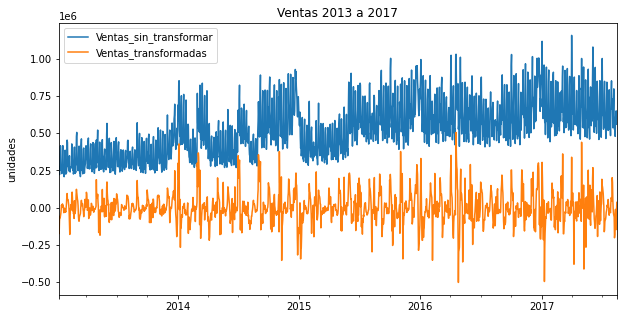

In [371]:
#Comparamos sumatoria de ventas de todas las sucursales sin transformar y transformadas 
df_merge = pd.merge(pd.DataFrame(df_agg), pd.DataFrame(df_agg1), left_index=True, right_index=True)
# Graficamos df (Sumatoria) con valores sin transformar y el df (sumatoria) con valores tranformados
figura(df_merge,
       'Ventas 2013 a 2017',
       'unidades');

In [372]:
ventas2016_2017 = df_agg['2016-08-15':'2017-08-15']
ventas2015_2016 = df_agg['2015-08-15':'2016-08-15']
ventas2016_2017.columns = ['ventas2016_2017']
ventas2015_2016.columns = ['ventas2015_2016']

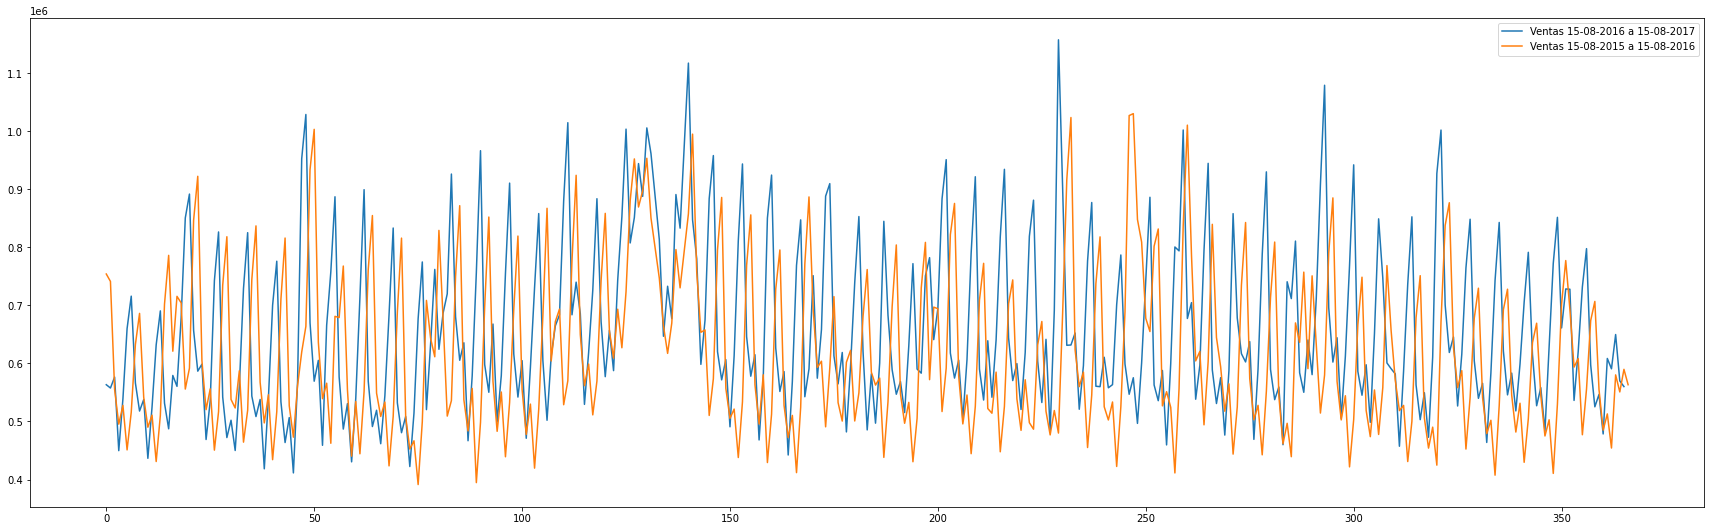

In [373]:
#Comparación de ventas sin transofrmar entre los 2 últimos años de la serie
plt.rcParams['figure.figsize'] = (30, 9)
plt.plot(ventas2016_2017.values, label='Ventas 15-08-2016 a 15-08-2017')
plt.plot(ventas2015_2016.values, label='Ventas 15-08-2015 a 15-08-2016')
plt.legend()

In [374]:
url2 = "https://raw.githubusercontent.com/safranco8/Mentoria2022-G2/main/df_sum.csv"
df_sum = pd.read_csv(url2, index_col=0 ,parse_dates=True)
df_sum

,sales,date.1,Year,Month,Year_month,Weekday,Day,ret_1,ret_2,ret_7,dcoilwtico
date,,,,,,,,,,,
2013-01-01,49807.780010,2013-01-01,2013,1,2013-01,Tuesday,1,NaN,NaN,NaN,93.14
2013-01-02,49807.780010,2013-01-02,2013,1,2013-01,Wednesday,2,49807.780010,NaN,NaN,93.14
2013-01-03,37982.626020,2013-01-03,2013,1,2013-01,Thursday,3,49807.780010,49807.780010,NaN,92.97
2013-01-04,37766.553008,2013-01-04,2013,1,2013-01,Friday,4,37982.626020,49807.780010,NaN,93.12
2013-01-05,44355.684999,2013-01-05,2013,1,2013-01,Saturday,5,37766.553008,37982.626020,NaN,93.20
...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,63934.322970,2017-08-11,2017,8,2017-08,Friday,11,52308.346000,68254.368030,70643.221034,48.81
2017-08-12,56080.757022,2017-08-12,2017,8,2017-08,Saturday,12,63934.322970,52308.346000,71393.251000,47.59
2017-08-13,63441.041025,2017-08-13,2017,8,2017-08,Sunday,13,56080.757022,63934.322970,71856.356000,47.59


# Consignas del trabajo práctico N°3

Se proponen las siguientes actividades motivadoras:

A partir de las series transformadas, se proponen actividades orientadoras, sin perjuicio de que se puedan incorporar análisis adicionales. Las actividades no están separadas en secciones para resaltar que no se trata de pasos aislados.

**Se pide:**

* Realizar la división entre datos de entrenamiento y test usando el procedimiento [Walk-Forward Validation](https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/). Alternativamente se la puede implementar usando [timeSeriesSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html).
* Entrenar al menos un modelo ["baseline"](https://otexts.com/fpp2/simple-methods.html)  (Average Forecast y/o Naive Forecast).
* Identificar cuáles son los parámetros y los hiperparamétros de los modelos SARIMA. 
* Entrenar modelos [SARIMA](https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html).
* Tunear los hiperparamétros. Puede ser útil la función [auto_arima](https://alkaline-ml.com/pmdarima/auto_examples/arima/example_auto_arima.html#sphx-glr-auto-examples-arima-example-auto-arima-py) de la biblioteca pmdarima.
* Entrenar modelos [LSTM](
https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/).
* Entrenar modelos [Prophet](https://facebook.github.io/prophet/docs/quick_start.html#python-api). [Otra referencia](https://towardsdatascience.com/time-series-analysis-with-facebook-prophet-how-it-works-and-how-to-use-it-f15ecf2c0e3a).
* Entrenar un modelo de regresión basado en árboles, por ejemplo [XG Boost Regressor](https://towardsdatascience.com/using-gradient-boosting-for-time-series-prediction-tasks-600fac66a5fc).
* Evaluar el desempeño de los modelos usando varias métricas ([Error Cuadrático Medio](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error), [Error Absoluto Medio](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error), [Error Absoluto Mediano](https://scikit-learn.org/stable/modules/model_evaluation.html#median-absolute-error)). ¿Cómo podemos saber en un problema de regresión si un modelo es "bueno"?¿Se pudo superar a los modelos "baseline"?

**Opcional:**

* Entrenar modelos [SARIMAX](https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html). Estos modelos consisten en modelos SARIMA con el agregado de variables exógenas. Tales variables exógenas pueden ser el precio de petróleo o variables dummy como los días de la semana. Muy recomendable!

* Entrenar modelos de [Suavizado Exponencial Estacionales](https://www.statsmodels.org/dev/examples/notebooks/generated/exponential_smoothing.html#Holt%E2%80%99s-Winters-Seasonal).

## Fecha de entrega

__29/07__ 


## Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis realizado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver tal como los compañeros de clase. Dicho informe puede ser un notebook, a condición de que en el mismo se efectúe un análisis escrito suficientemente detallado de los resultados. 


#**Respuestas a consignas planteadas**

## Train - Test - Validation EJEMPLOS

### **Tran test split**

In [375]:
# Division de entrenamiento y prueba para serie agregada (1 única columna)
X = df_agg1.values
train_size = int(len(X) * 0.70)
train0, test0 = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train0)))
print('Testing Observations: %d' % (len(test0)))

Observations: 1681
Training Observations: 1176
Testing Observations: 505


In [376]:
train00=df_agg1[0:1176] 
test00=df_agg1[1176:]
train00.head(3)

,Ventas_transformadas
date,
2013-01-08,-159673.802943
2013-01-09,-175092.728926
2013-01-10,-90861.160061


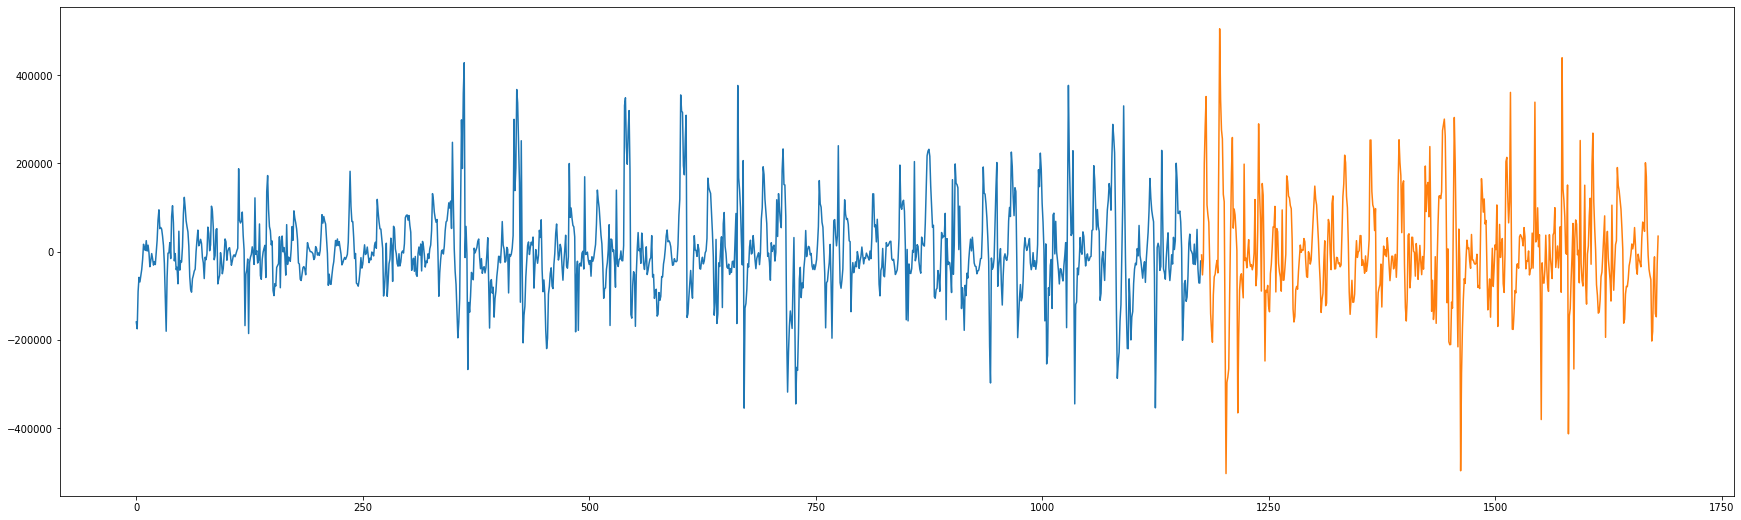

In [377]:
# Grafico de división de serie en entrenamiento y prueba (70/30)
from matplotlib import pyplot
pyplot.plot(train0)
pyplot.rcParams["figure.figsize"] = (12, 8)
pyplot.plot([None for i in train0] + [x for x in test0])
pyplot.show()

## **Escalado**

In [378]:
scaler = MinMaxScaler((0,1))
df_agg_scaled = pd.DataFrame(scaler.fit_transform(df_agg), #fit_transform(df_agg1)
                       index=df_agg.index, 
                       columns=df_agg.columns, dtype=None, copy=False)

In [379]:
sales = df_agg_scaled["Ventas_sin_transformar"]
# sales = df_agg_scaled["Ventas_transformadas"]

In [380]:
n_test_cases = 30
train_model, test_model = train_test_split(df_agg_scaled,n_test_cases)

### **TimeSeriesSplit**

Observations: 841
Training Observations: 421
Testing Observations: 420
Observations: 1261
Training Observations: 841
Testing Observations: 420
Observations: 1681
Training Observations: 1261
Testing Observations: 420


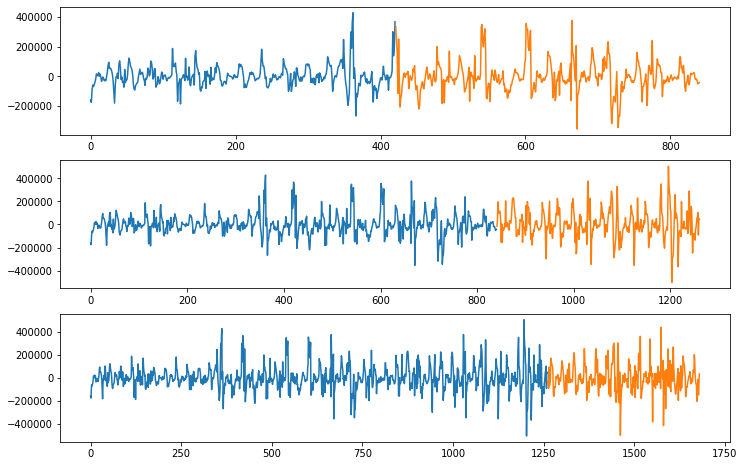

In [381]:
# Dvisión entrenamiento test TimeSeriesSplit

splits = TimeSeriesSplit(n_splits=3)
pyplot.figure(1)
index = 1
for train1_index, test1_index in splits.split(X):
	train1 = X[train1_index]
	test1 = X[test1_index]
	print('Observations: %d' % (len(train1) + len(test1)))
	print('Training Observations: %d' % (len(train1)))
	print('Testing Observations: %d' % (len(test1)))
	pyplot.subplot(310 + index)
	pyplot.plot(train1)
	pyplot.plot([None for i in train1] + [x for x in test1])
	index += 1
pyplot.show()

### **Walk Forward Validación**

In [382]:
n_train = 1650
n_records = len(X)
for i in range(n_train, n_records):
	train2, test2 = X[0:i], X[i:i+1]
	print('train2=%d, test2=%d' % (len(train2), len(test2)))

train2=1650, test2=1
train2=1651, test2=1
train2=1652, test2=1
train2=1653, test2=1
train2=1654, test2=1
train2=1655, test2=1
train2=1656, test2=1
train2=1657, test2=1
train2=1658, test2=1
train2=1659, test2=1
train2=1660, test2=1
train2=1661, test2=1
train2=1662, test2=1
train2=1663, test2=1
train2=1664, test2=1
train2=1665, test2=1
train2=1666, test2=1
train2=1667, test2=1
train2=1668, test2=1
train2=1669, test2=1
train2=1670, test2=1
train2=1671, test2=1
train2=1672, test2=1
train2=1673, test2=1
train2=1674, test2=1
train2=1675, test2=1
train2=1676, test2=1
train2=1677, test2=1
train2=1678, test2=1
train2=1679, test2=1
train2=1680, test2=1


## **Baseline**

### **Naive Forecast**

El algoritmo de persistencia usa el valor en el paso de tiempo anterior (t-1) para predecir el resultado esperado en el siguiente paso de tiempo (t+1).


"Pronóstico ingenuo"

In [383]:
# Dada la observación en t-1, predecimos la observación en t+1.
values = pd.DataFrame(df_agg1.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1 - original']
print(dataframe.head(5))

               t  t+1 - original
0            NaN  -159673.802943
1 -159673.802943  -175092.728926
2 -175092.728926   -90861.160061
3  -90861.160061   -58541.309990
4  -58541.309990   -68875.900182


In [384]:
# División de entrenamiento y test
Xx = dataframe.values
train_size = int(len(Xx) * 0.7)
train, test = Xx[1:train_size], Xx[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [385]:
# Modelo
def model_persistence(x):
	return x

In [386]:
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)

Test MSE: 11889703444.108


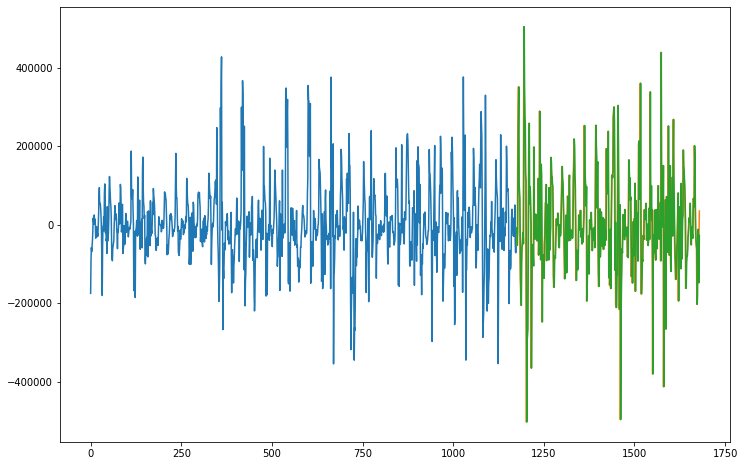

In [387]:
pyplot.plot(train_y)
pyplot.rcParams["figure.figsize"] = (100, 10)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()

### **Naive Forecaste** (2)

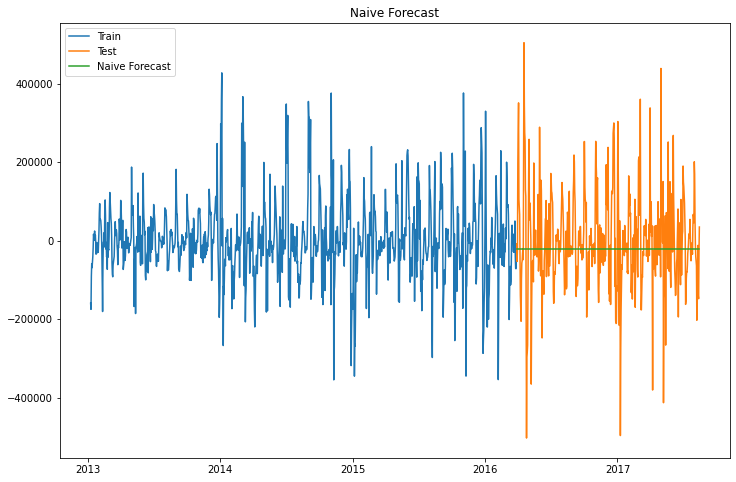

In [388]:
dd= np.asarray(train00.Ventas_transformadas)
y_hat = test00.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train00.index, train00['Ventas_transformadas'], label='Train')
plt.plot(test00.index,test00['Ventas_transformadas'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

### **Average Forecast**

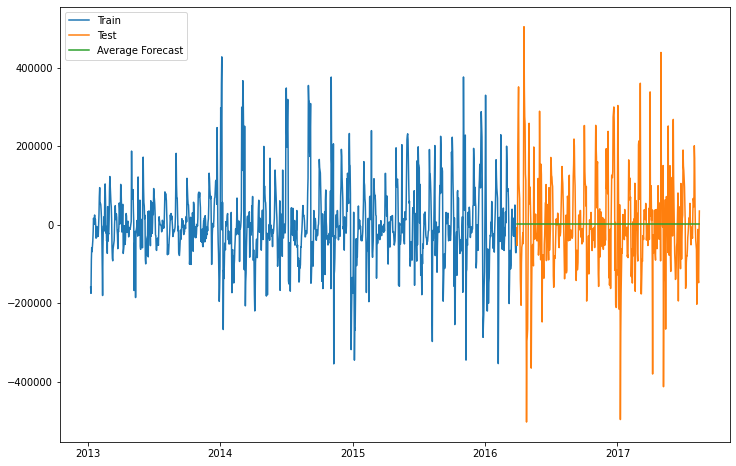

In [389]:
y_hat_avg = test00.copy()
y_hat_avg['avg_forecast'] = train00['Ventas_transformadas'].mean()
plt.figure(figsize=(12,8))
plt.plot(train00['Ventas_transformadas'], label='Train')
plt.plot(test00['Ventas_transformadas'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

## **ARIMA / SARIMA**

### **Descripción teórica**

**ARIMA (Autoregressive Integrated Moving Average)**

ARIMA es un modelo que se utiliza para predecir tendencias futuras en una serie de datos de tiempo. Es un modelo de forma de análisis de regresión. El modelo Arima esta compuesto por 3 términos:

AR (Autoregresión) : Modelo que muestra una variable cambiante que retrocede sobre sus propios valores atrasados/anteriores. 

I (Integrado) : Diferenciación de observaciones sin procesar para permitir que la serie temporal se vuelva estacionaria.

MA (Promedio móvil) : Dependencia entre una observación y un error residual de un modelo de promedio móvil Para los modelos ARIMA, una notación estándar sería ARIMA con p, d y q, donde los valores enteros sustituyen a los parámetros para indicar el tipo de modelo ARIMA utilizado.

p: el número de observaciones de retraso en el modelo; también conocido como el orden de retardo.

d: el número de veces que se diferencian las observaciones sin procesar; también conocido como el grado de diferenciación.

q: el tamaño de la ventana de promedio móvil; también conocido como el orden de la media móvil.

Definición del modelo

El modelo ARIMA es la abreviatura del modelo Autoregresivo de Media Móvil Integrada. La diferencia con el modelo ARMA es pequeña: solo hay un efecto adicional que hace que la serie temporal no sea estacionaria. Un ejemplo simple de esto sería una tendencia lineal creciente, como se muestra en la siguiente ecuación:

            Xt=c+ϵt+∑i=1pϕiXt−i+∑i=1qθiϵt−i+δt 
Al diferenciar una serie temporal, en realidad comienza a modelar las diferencias de un paso a otro en lugar de los valores originales. Si los valores reales de una variable no son estables en el tiempo, aún es posible que las diferencias sean estables en el tiempo.

La tendencia lineal es un gran ejemplo de esto. Imagine una tendencia lineal que comienza desde 0 y se incrementa en 2 cada paso de tiempo. Los valores no serán para nada estacionarios: aumentarán infinitamente. Sin embargo, la diferencia entre cada valor y el siguiente es siempre 2, por lo que la serie temporal diferenciada es perfectamente estacionaria.

|Modelo         |p   d   q |Diferenciado         |Método|
|---------------|----------|---------------------|--------------|
|Arima(0,0,0)   |0   0   0 |$y_t=Y_t$            |Ruido Blanco|
|ARIMA (0,1,0)  |0   1   0 |$y_t = Y_t - Y_{t-1}$| Caminata aleatoria|
|ARIMA (0,2,0)  |0   2   0 |$y_t = Y_t - 2Y_{t-1} + Y_{t-2}$| Constante|
|ARIMA (1,0,0)  |1   0   0 |$\hat Y_t = \mu + \Phi_1 Y_{t-1} + \epsilon $| AR(1): Modelo de regresión de primer orden|
|ARIMA (2, 0, 0)|2   0   0 |$\hat Y_t = \Phi_0 + \Phi_1 Y_{t-1} + \Phi_2 Y_{t-2} + \epsilon$| AR(2): Modelo de regresión de segundo orden|
|ARIMA (1, 1, 0)|1   1   0 |$\hat Y_t = \mu + Y_{t-1} + \Phi_1 (Y_{t-1}- Y_{t-2})$ | Modelo autoregresivo de primer orden diferenciado|
|ARIMA (0, 1, 1)|0   1   1 |$\hat Y_t = Y_{t-1} - \Phi_1 e^{t-1}$| Simple exponential smoothing|
|ARIMA (0, 0, 1)|0   0   1 |$\hat Y_t = \mu_0+ \epsilon_t – \omega_1 \epsilon_{t-1}$| MA(1): Modelo de regresión de primer orden|
ARIMA (0, 0, 2) |0   0   2 |$\hat Y_t = \mu_0+ \epsilon_t – \omega_1 \epsilon_{t-1} – \omega_2 \epsilon_{t-2}$|MA(1): Modelo de regresión de segundo orden|
|ARIMA (1, 0, 1)|1   0   1 |$\hat Y_t = \Phi_0 + \Phi_1 Y_{t-1}+ \epsilon_t – \omega_1 \epsilon_{t-1}$| Modelo ARMA|
|ARIMA (1, 1, 1)|1   1   1 |$\Delta Y_t = \Phi_1 Y_{t-1} + \epsilon_t - \omega_1 \epsilon_{t-1}$ |Modelo ARIMA|
|ARIMA (1, 1, 2)|1   1   2 |$\hat Y_t = Y_{t-1} + \Phi_1 (Y_{t-1} - Y_{t-2} )- \Theta_1 e_{t-1} - \Theta_1 e_{t-1}$|Suavizamiento exponencial lineal de tendencia amortiguada|
|ARIMA (0, 2, 1) OR (0,2,2) |0 2 1 |$\hat Y_t = 2 Y_{t-1} - Y_{t-2} - \Theta_1 e_{t-1} - \Theta_2 e_{t-2}$|  Suavizamiento exponencial lineal|

**Valor de d**

En nuestro caso entendemos que con la segunda diferenciación eliminamos la estacionariedad de la serie. Se puede inferir graficamente aunque tambien se aplica Dickey-Fuller para determinarlo.

**Como encontrar el orden del término AR (p)**

Se puede inferir el número requerido de términos de AR inspeccionando el gráfico de Autocorrelación parcial (PACF).

La Autocorrelación parcial se puede imaginar como la correlación entre la serie y su rezago, despues de excluir las contribuciones de los rezagos intermedios. Entonces la PACF transmite la correlación pura entre un retraso y la serie, de esta manera sabrá si ese retraso es necesario en el plazo de AR o no.

Cualquier autocorrelación en una serie estacionaria se puede rectificar agregando suficientes términos de AR. Entonces, inicialmente tomamos el orden del término AR como igual a ytantos rezagos que cruzan el límite de significancia en la gráfica PACF.

**Como encontrar el orden del término MA (q)**
Se puede mirar el gráfico ACF para inferir el número de términos MA. Un término MA es técnicamente el error del prónostico retrasado.

El ACF indica cuántos términos MA se requieren para eliminar cualquier autocorrelación en la serie estacionaria.

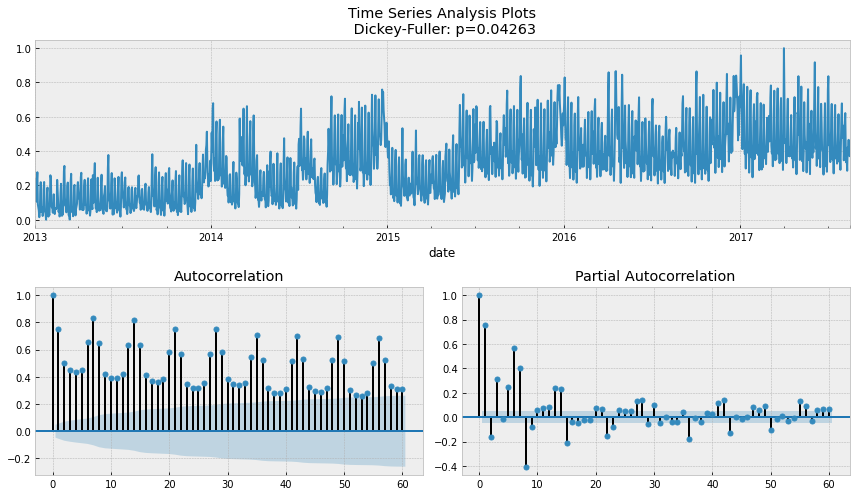

In [390]:
tsplot(sales, lags=60)

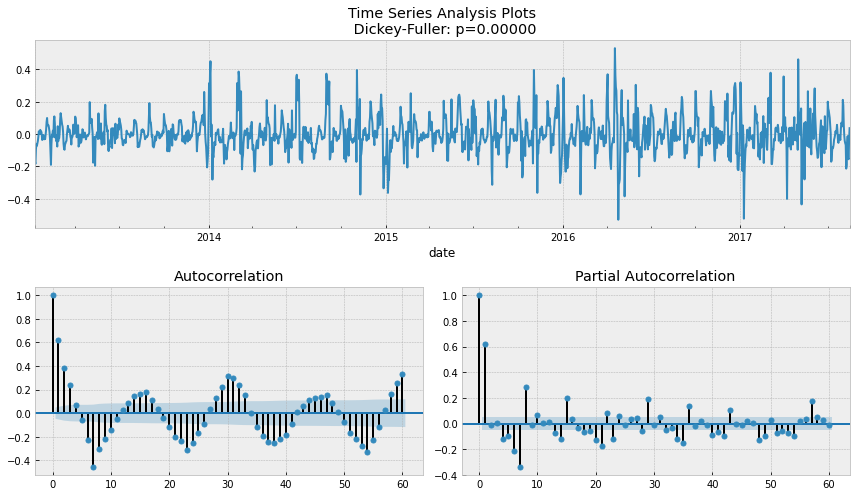

In [391]:
diff = sales.diff(7)
tsplot(diff[7:], lags=60)

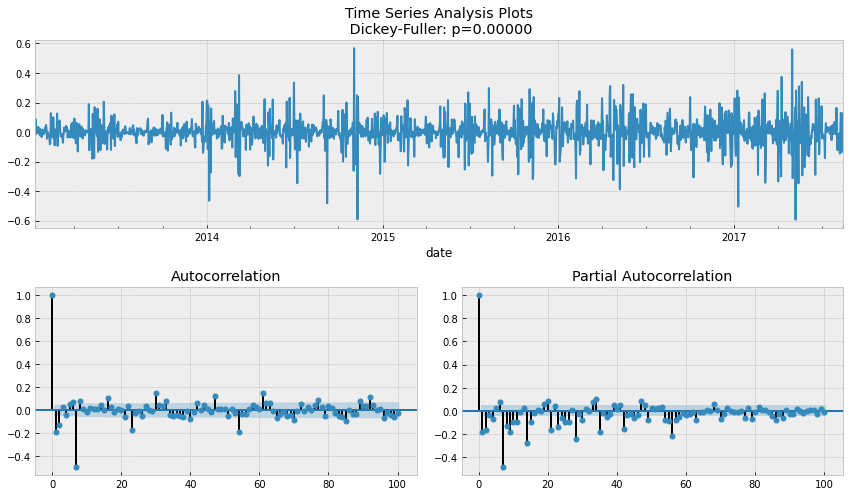

In [392]:
diff = diff.diff(1)
tsplot(diff[7+1:], lags=100)

**Seasonal ARIMA**

Es una extensión de ARIMA que admite explícitamente datos de series temporales univariadas con un componente estacional. Agrega tres nuevos hiperparámetros para especificar la autorregresión (AR), diferenciación (I) y media móvil (MA) para el componente estacional de la serie, así como un parámetro adicional para el período de la estacionalidad.

Hay cuatro elementos estacionales que no forman parte de ARIMA que deben configurarse; ellos son:

P: orden autorregresivo estacional.

D: Orden de diferencia estacional.

P: Orden promedio móvil estacional.

m: El número de pasos de tiempo para un solo período estacional.

### **Modelo SARIMA**

In [393]:
n_test_cases = 28
train_sarima, test_sarima = train_test_split(df_agg_log["Ventas_sin_transformar"],n_test_cases)

In [394]:
#Selección de hiperparámetros
def sarima_params():
  p = q = range(1,4)
  d = range(0,2)

  pdq = list(itertools.product(p,d,q))

  pdqs = [(x[0],x[1],x[2],7) for x in list(itertools.product(p,d,q))]
  ans = []
  for comb in pdq:
    for combs in pdqs:
      mod = sm.tsa.statespace.SARIMAX(train_sarima,
                                      order=comb,
                                      seasonal_order=combs)
      output=mod.fit()
      test_predictions = output.predict(start = train_sarima.shape[0], end = train_sarima.shape[0]+n_test_cases-1)
      error = measure_rmse(np.exp(test_predictions),np.exp(test_sarima))
      ans.append([comb, combs, output.aic,error])
      print('ARIMA {} x {}7 : rmse = {}'.format(comb,combs,error))
      
  ans_df = pd.DataFrame(ans, columns=['pdq','pdqs','aic','rmse'])
  return ans_df.loc[ans_df['rmse'].idxmin()]

In [395]:
#sarima_params()

In [396]:
#Entrenamiento
mod = sm.tsa.statespace.SARIMAX(train_sarima,
                                     order=(1,1,1),
                                     seasonal_order=(2,0,1,7))
output = mod.fit(disp=-1)

In [397]:
#Prediccion Train
train_predictions_sarima = np.exp(output.predict(n_periods=test_sarima.shape[0], return_conf_int=True))
train_results_sarima = pd.DataFrame(data={'Train Predictions':train_predictions_sarima, 'Actuals':np.exp(train_sarima)})
train_results_sarima

,Train Predictions,Actuals
2013-01-01,1.000000,434231.998948
2013-01-02,434231.970982,434231.998948
2013-01-03,434231.969717,312064.717106
2013-01-04,330851.033107,307413.870095
2013-01-05,328927.922637,419180.355196
...,...,...
2017-07-14,580179.649486,583362.062387
2017-07-15,759944.956981,742607.868059
2017-07-16,820277.509619,842517.376033
2017-07-17,617851.066112,621346.094939


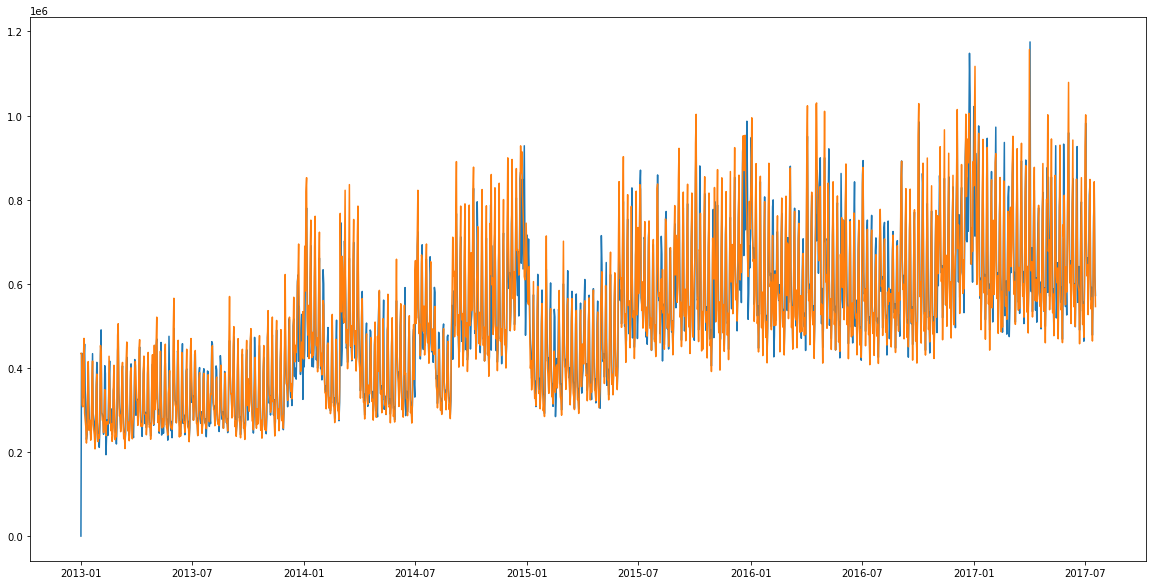

In [398]:
plt.figure(figsize=(20, 10))
plt.plot(train_results_sarima['Train Predictions'])
plt.plot(train_results_sarima['Actuals'])

In [399]:
#Predicción Test
test_predictions_sarima = np.exp(output.predict(start = train_sarima.shape[0], end = train_sarima.shape[0]+n_test_cases-1))
test_results_sarima = pd.DataFrame(data={'Test Predictions':test_predictions_sarima, 'Actuals':np.exp(test_sarima)})
test_results_sarima

,Test Predictions,Actuals
2017-07-19,594462.788727,583188.254136
2017-07-20,495801.994266,518086.718965
2017-07-21,615308.602989,598427.633231
2017-07-22,793726.905599,705424.326818
2017-07-23,868193.785391,791114.838337
2017-07-24,635456.880561,615271.442097
2017-07-25,580887.289016,526964.028779
2017-07-26,627788.972702,558061.351161
2017-07-27,519648.626781,483512.581081
2017-07-28,639219.203471,628975.004227


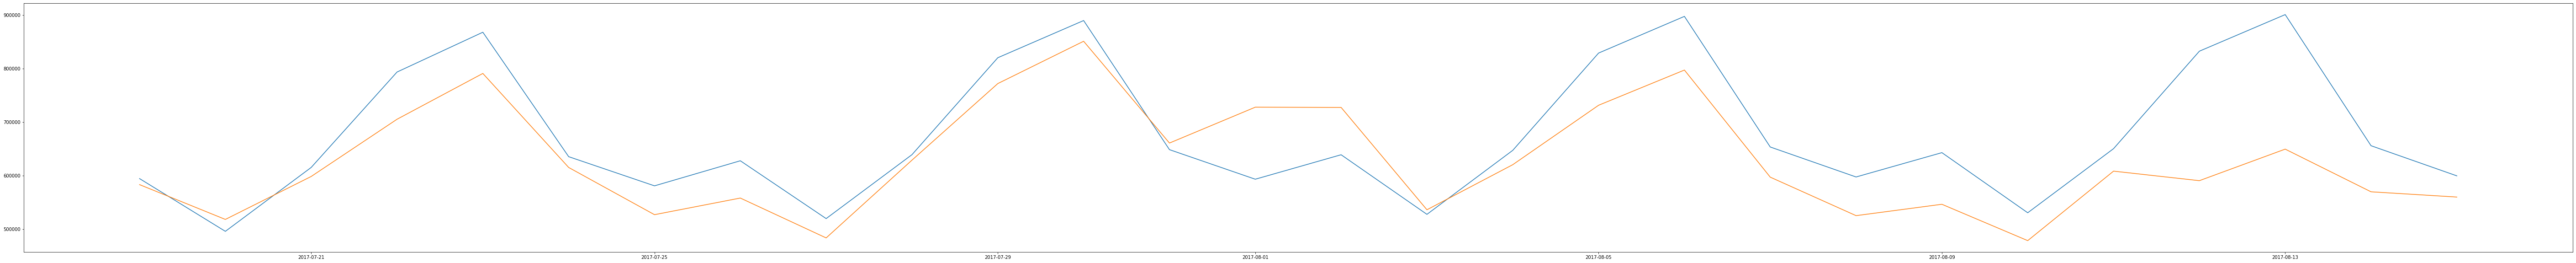

In [400]:
import matplotlib.pyplot as plt
plt.plot(test_results_sarima['Test Predictions'])
plt.plot(test_results_sarima['Actuals'])

### **Auto Arima**

**Modelo Auto-Arima**
La función auto_arima() obtiene los mejores parametros de p,d,q,P,D,Q

Nota: El parámetro se refiere al número de periodo para cada estacionalidad

7 para los días

12 para los meses

52 para las semanas

4 Trimestral

1 Anual

In [401]:
modelo_auto=pm.auto_arima(df_agg_scaled,start_p=0,d=1,start_q=0,
          max_p=2,max_d=2,max_q=2, start_P=0,
          D=1, start_Q=0, max_P=2,max_D=2,
          max_Q=2, m=7, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=50)
print(modelo_auto)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=-3177.789, Time=0.45 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=-3707.896, Time=1.59 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=3.39 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=-3233.947, Time=0.46 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=-3820.868, Time=2.92 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=7.98 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=1.87 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=-3750.772, Time=0.83 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=-3885.817, Time=1.42 sec
 ARIMA(2,1,0)(1,1,0)[7]             : AIC=-3786.416, Time=1.62 sec
 ARIMA(2,1,0)(2,1,1)[7]             : AIC=inf, Time=6.52 sec
 ARIMA(2,1,0)(1,1,1)[7]             : AIC=inf, Time=4.51 sec
 ARIMA(2,1,1)(2,1,0)[7]             : AIC=inf, Time=8.10 sec
 ARIMA(1,1,1)(2,1,0)[7]             : AIC=inf, Time=6.77 sec
 ARIMA(2,1,0)(2,1,0)[7] intercept   : AIC=-3883.819, Time=6.9

In [402]:
model2=sm.tsa.statespace.SARIMAX(train_model, order=(2, 1, 0), 
                                        seasonal_order=(2, 1, 0,7)).fit(disp=-1)

In [403]:
train_predictions_sarima2 = scaler.inverse_transform(model2.fittedvalues.values.reshape(-1,1)).reshape(-1,)
train_results_sarima2 = pd.DataFrame(data={'Train Predictions2':train_predictions_sarima2, 'Actuals':scaler.inverse_transform(train_model.Ventas_sin_transformar.values.reshape(-1,1)).reshape(-1,)})
train_results_sarima2

,Train Predictions2,Actuals
0,207270.842019,434231.998948
1,434231.998732,434231.998948
2,434231.998809,312064.717106
3,312064.717413,307413.870095
4,307413.870222,419180.355196
...,...,...
1653,564751.649172,565555.624946
1654,463629.693069,463807.990928
1655,581540.387584,583362.062387
1656,797265.972293,742607.868059


In [404]:
test_predictions_sarima2 = scaler.inverse_transform(model2.predict(start = train_model.shape[0], end = train_model.shape[0]+n_test_cases-1).values.reshape(-1,1)).reshape(-1,)
test_results_sarima2 = pd.DataFrame(data={'Test Predictions SARIMA 2':test_predictions_sarima2, 'Actuals':scaler.inverse_transform(test_model.Ventas_sin_transformar.values.reshape(-1,1)).reshape(-1,)})
test_results_sarima2

ValueError: ignored

In [ ]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.plot(test_results_sarima2['Test Predictions2'], label='Test Predictions SARIMA')
plt.plot(test_results_sarima2['Actuals'], label='Actuals')
plt.legend()

## **LSTM**

### **Descripción teórica**

LSTM significa memoria a corto plazo. Es un modelo o arquitectura que amplía la memoria de las redes neuronales recurrentes. Por lo general, las redes neuronales recurrentes tienen "memoria a corto plazo" en el sentido de que utilizan información anterior persistente para ser utilizada en la red neuronal actual. Esencialmente, la información anterior se utiliza en la presente tarea. Eso significa que no tenemos una lista de toda la información anterior disponible para el nodo neuronal. LSTM introduce la memoria a largo plazo en las redes neuronales recurrentes. Mitiga el problema del gradiente de fuga, que es donde la red neuronal deja de aprender porque las actualizaciones de los diversos pesos dentro de una red neuronal dada se vuelven cada vez más pequeñas. Lo hace mediante el uso de una serie de "puertas". Estos están contenidos en bloques de memoria que están conectados a través de capas, así:

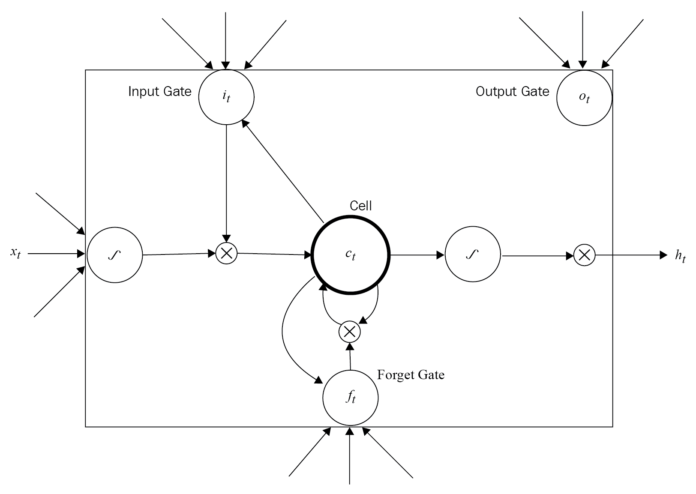

trabajo LSTM Hay tres tipos de puertas dentro de una unidad: Puerta de entrada: escala la entrada a la celda (escritura) Puerta de salida: escala la salida a la celda (lectura) Forget Gate: escala el valor de la celda anterior (restablecer) Cada puerta es como un interruptor que controla la lectura/escritura, incorporando así la función de memoria a largo plazo en el modelo.

**Escalado**
Las LSTMs son sensibles a la escala de los datos de entrada, especialmente cuando se utilizan las funciones de activación sigmoide (por defecto) o tanh. Puede ser una buena práctica reescalar los datos al rango de 0 a 1, también llamado normalización.


**Estructura**
La red LSTM espera que los datos de entrada (X) se proporcionen con una estructura de matriz específica en forma de: [muestras, pasos de tiempo, características]. Nuestros datos preparados están en la forma: [muestras, características] y estamos enmarcando el problema como un paso de tiempo para cada muestra. Podemos transformar los datos de entrada del entrenamiento preparado y de la prueba en la estructura esperada utilizando numpy.reshape() de la siguiente manera:

In [ ]:
# split_sequence(sequence, 5, 2)
# [[[1], [2], [3], [4], [5]]] [[6], [7]]
# [[[2], [3], [4], [5], [6]]] [[7], [8]]
# [[[3], [4], [5], [6], [7]]] [[8], [9]]
def split_sequence(sequence, look_back, forecast_horizon):
 X, y = list(), list()
 for i in range(len(sequence)): 
   lag_end = i + look_back
   forecast_end = lag_end + forecast_horizon
   if forecast_end > len(sequence):
     break
   seq_x, seq_y = [[a] for a in sequence[i:lag_end]], sequence[lag_end:forecast_end]
   X.append(seq_x)
   y.append(seq_y)
 return np.array(X), np.array(y)

In [ ]:
X1, y1 = split_sequence(sales.values,28,28)

In [ ]:
#División train - test
n_test_cases = 28
X_train1, X_val1 = train_test_split(X1,n_test_cases)
y_train1, y_val1 = train_test_split(y1,n_test_cases)

**Parámetros** para ajustar el modelo LSTM.

**hidden_layer_sizes**: Debe proporcionar una cantidad de capas ocultas y neuronas para cada capa oculta. Por ejemplo, hidden_layer_sizes – (5,3,3) significa que hay tres capas ocultas y el número de neuronas para la capa uno es 5, para la capa dos es 3 y para la capa tres es 3, respectivamente. El valor predeterminado es (100), es decir, una capa oculta con 100 neuronas.

**activation**: Esta es la función de activación de una capa oculta; hay cuatro funciones de activación disponibles para su uso; el valor predeterminado es "relu". relu: La función de unidad lineal rectificada, devuelve logística: La función sigmoidea logística, devuelve f(x) = 1 / (1 + exp(-x)). identidad: activación sin operación, útil para implementar un cuello de botella lineal, devuelve f(x) = x tanh: La función tan hiperbólica, devuelve.

**solver**: Esto es para optimizar el peso. Hay tres opciones disponibles, la predeterminada es "adam". adam: Optimizador basado en gradiente estocástico propuesto por Diederik Kingma y Jimmy Ba, que funciona bien para un gran conjunto de datos lbfgs: Pertenece a la familia de métodos cuasi-Newton, funciona bien para conjuntos de datos pequeños sgd: Descenso de gradiente estocástico

**max_iter**: Este es el número máximo de iteraciones para que el solucionador converja, el valor predeterminado es 200.

**learning_rate_init**: Esta es la tasa de aprendizaje inicial para controlar el tamaño de paso para actualizar los pesos (solo se aplica a los solucionadores sgd/ adam), el valor predeterminado es 0,001.

In [ ]:
#Selección de hiperparámetros
def lstm_params():
  # Set up parameter grid
  param_grid = {  
      'units': [50, 100, 200],
      'units2': [50, 100],
      'epochs': [70, 100],
      'batch': [5, 10]
  }
  # Generate all combinations of parameters
  all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
  # Create a list to store MAPE values for each combination
  rmses = [] 
  print("Combinations: ", len(all_params))
  # Use cross validation to evaluate all parameters
  for params in all_params:
      print(">>>>>>>>>>>>>>>>>>>>>>>",params,"<<<<<<<<<<<<<<<<<<<<<<<<<<<<")
      # Fit a model using one parameter combination
      model_LSTM = Sequential()
      model_LSTM.add(LSTM(params.get("units"), activation='relu', input_shape=(28, 1)))
      model_LSTM.add(Dense(params.get("units2"), activation='relu'))
      model_LSTM.add(Dense(14))
      model_LSTM.compile(loss='mse', optimizer='adam')
      model_LSTM.fit(X_train1, y_train1, epochs=params.get("epochs"), batch_size=params.get("batch"), verbose=1, shuffle=False)  
      test_predictions = model_LSTM.predict(X_val1)
      error = measure_rmse(test_predictions,y_val1)
      rmses.append(error)
      
  # Tuning results
  tuning_results = pd.DataFrame(all_params)
  tuning_results['rmses'] = rmses
  # Find the best parameters
  best_params = all_params[np.argmin(rmses)]
  return best_params

In [ ]:
# lstm_params()

In [ ]:
#Definición del modelo
model_LSTM = Sequential()
model_LSTM.add(LSTM(100, activation='relu', input_shape=(28, 1)))
model_LSTM.add(Dense(50, activation='relu'))
model_LSTM.add(Dense(28))
model_LSTM.compile(loss='mse', optimizer='adam')

In [ ]:
#Entrenamiento
model_LSTM.fit(X_train1, y_train1, epochs=70, batch_size=10, verbose=1, shuffle=False)
test_predictions = model_LSTM.predict(X_val1)
error = measure_rmse(test_predictions,y_val1)
print(error)

In [ ]:
# Prediccion en train
first_day = 0
train_predictions = scaler.inverse_transform(model_LSTM.predict(X_train1, batch_size=10))[first_day]
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':scaler.inverse_transform(y_train1[first_day].reshape(-1,1)).reshape(-1,)})
print(train_results)
plt.figure(figsize=(20, 10))
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])

In [ ]:
# Prediccion en test
first_day = 0
test_predictions_LSTM = scaler.inverse_transform(model_LSTM.predict(X_val1, batch_size=15))[first_day]
test_results_LSTM = pd.DataFrame(data={'Test Predictions':test_predictions_LSTM, 'Actuals':scaler.inverse_transform(y_val1[first_day].reshape(-1,1)).reshape(-1,)})
print(test_results_LSTM)
plt.figure(figsize=(20, 10))
plt.plot(test_results_LSTM['Test Predictions'])
plt.plot(test_results_LSTM['Actuals'])

In [ ]:
#WF validation
def wf_validation(model,x_train,y_train,epochs=20,batch=2,n_train=1655):
  n_records = len(x_train)
  errors = []
  for i in range(n_train, n_records):
    x_train_wf, x_test_wf = x_train[0:i], x_train[i:i+28]
    y_train_wf, y_test_wf = y_train[0:i], y_train[i:i+28]
    model.fit(x_train_wf, y_train_wf, epochs=epochs, batch_size=batch, verbose=0, shuffle=False)
    test_predictions = model.predict(x_test_wf)
    error = measure_rmse(test_predictions,y_test_wf)
    errors.append(error)
    print(' > %.3f' % error)
  return np.mean(errors)

In [ ]:
mean_errors = wf_validation(model_LSTM,X1,y1,epochs=20,batch=20,n_train=1655)
mean_errors

In [ ]:

# # grid search lstm for airline passengers
# from math import sqrt
# from numpy import array
# from numpy import mean
# from pandas import DataFrame
# from pandas import concat
# from pandas import read_csv
# from sklearn.metrics import mean_squared_error
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
 
# # split a univariate dataset into train/test sets
# def train_test_split(data, n_test):
# 	return data[:-n_test], data[-n_test:]
 
# # transform list into supervised learning format
# def series_to_supervised(data, n_in=1, n_out=1):
# 	df = DataFrame(data)
# 	cols = list()
# 	# input sequence (t-n, ... t-1)
# 	for i in range(n_in, 0, -1):
# 		cols.append(df.shift(i))
# 	# forecast sequence (t, t+1, ... t+n)
# 	for i in range(0, n_out):
# 		cols.append(df.shift(-i))
# 	# put it all together
# 	agg = concat(cols, axis=1)
# 	# drop rows with NaN values
# 	agg.dropna(inplace=True)
# 	return agg.values
 
# # root mean squared error or rmse
# def measure_rmse(actual, predicted):
# 	return sqrt(mean_squared_error(actual, predicted))
 
# # difference dataset
# def difference(data, order):
# 	return [data[i] - data[i - order] for i in range(order, len(data))]
 
# # fit a model
# def model_fit(train, config):
# 	# unpack config
# 	n_input, n_nodes, n_epochs, n_batch, n_diff = config
# 	# prepare data
# 	if n_diff > 0:
# 		train = difference(train, n_diff)
# 	# transform series into supervised format
# 	data = series_to_supervised(train, n_in=n_input)
# 	# separate inputs and outputs
# 	train_x, train_y = data[:, :-1], data[:, -1]
# 	# reshape input data into [samples, timesteps, features]
# 	n_features = 1
# 	train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], n_features))
# 	# define model
# 	model = Sequential()
# 	model.add(LSTM(n_nodes, activation='relu', input_shape=(n_input, n_features)))
# 	model.add(Dense(n_nodes, activation='relu'))
# 	model.add(Dense(1))
# 	model.compile(loss='mse', optimizer='adam')
# 	# fit model
# 	model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
# 	return model
 
# # forecast with the fit model
# def model_predict(model, history, config):
# 	# unpack config
# 	n_input, _, _, _, n_diff = config
# 	# prepare data
# 	correction = 0.0
# 	if n_diff > 0:
# 		correction = history[-n_diff]
# 		history = difference(history, n_diff)
# 	# reshape sample into [samples, timesteps, features]
# 	x_input = array(history[-n_input:]).reshape((1, n_input, 1))
# 	# forecast
# 	yhat = model.predict(x_input, verbose=0)
# 	return correction + yhat[0]
 
# # walk-forward validation for univariate data
# def walk_forward_validation(data, n_test, cfg):
# 	predictions = list()
# 	# split dataset
# 	train, test = train_test_split(data, n_test)
# 	# fit model
# 	model = model_fit(train, cfg)
# 	# seed history with training dataset
# 	history = [x for x in train]
# 	# step over each time-step in the test set
# 	for i in range(len(test)):
# 		# fit model and make forecast for history
# 		yhat = model_predict(model, history, cfg)
# 		# store forecast in list of predictions
# 		predictions.append(yhat)
# 		# add actual observation to history for the next loop
# 		history.append(test[i])
# 	# estimate prediction error
# 	error = measure_rmse(test, predictions)
# 	print(' > %.3f' % error)
# 	return error
 
# # score a model, return None on failure
# def repeat_evaluate(data, config, n_test, n_repeats=10):
# 	# convert config to a key
# 	key = str(config)
# 	# fit and evaluate the model n times
# 	scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
# 	# summarize score
# 	result = mean(scores)
# 	print('> Model[%s] %.3f' % (key, result))
# 	return (key, result)
 
# # grid search configs
# def grid_search(data, cfg_list, n_test):
# 	# evaluate configs
# 	scores = [repeat_evaluate(data, cfg, n_test) for cfg in cfg_list]
# 	# sort configs by error, asc
# 	scores.sort(key=lambda tup: tup[1])
# 	return scores
 
# # create a list of configs to try
# def model_configs():
# 	# define scope of configs
# 	# n_input = [14, 28]
# 	# n_nodes = [50,100,150]
# 	# n_epochs = [50,100]
# 	# n_batch = [150, 200, 250]
# 	# n_diff = [7,14,28]
# 	n_input = [14]
# 	n_nodes = [150]
# 	n_epochs = [100]
# 	n_batch = [200]
# 	n_diff = [7]
# 	# create configs
# 	configs = list()
# 	for i in n_input:
# 		for j in n_nodes:
# 			for k in n_epochs:
# 				for l in n_batch:
# 					for m in n_diff:
# 						cfg = [i, j, k, l, m]
# 						configs.append(cfg)
# 	print('Total configs: %d' % len(configs))
# 	return configs
 
# # define dataset
# # series = read_csv('monthly-airline-passengers.csv', header=0, index_col=0)
# data = sales
# # data split
# n_test = 12
# # model configs
# cfg_list = model_configs()
# # grid search
# scores = grid_search(data, cfg_list, n_test)
# print('done')
# # list top 10 configs
# for cfg, error in scores[:3]:
# 	print(cfg, error)

##**PROPHET**


In [ ]:
from prophet import Prophet
import itertools
from prophet.diagnostics import cross_validation, performance_metrics

In [ ]:
train_prophet, test_prophet = train_test_split(df_agg_log,28)

In [ ]:
df_prophet = pd.DataFrame()
df_prophet['ds'] = pd.to_datetime(train_prophet.index, format="%Y/%m/%d")
df_prophet['y'] = train_prophet["Ventas_sin_transformar"].values
df_prophet

In [ ]:
#Baseline model
model_Prophet = Prophet()
model_Prophet.fit(df_prophet)

In [ ]:
future = model_Prophet.make_future_dataframe(periods=28)
forecast = model_Prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [ ]:
train_prediction_prophet = forecast["yhat"]
train_results_prophet = pd.DataFrame(data={'Train Predictions':np.exp(train_prediction_prophet[:df_prophet.shape[0]]), 'Actuals':np.exp(df_prophet['y'])})
train_results_prophet

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(70, 10))
plt.plot(train_results_prophet['Train Predictions'])
plt.plot(train_results_prophet['Actuals'])

In [ ]:
# Cross validation
baseline_model_cv = cross_validation(model=model_Prophet, initial='1500 days', period='28 days', horizon = '28 days', parallel="processes")

In [ ]:
baseline_model_cv

In [ ]:
# Model performance metrics
baseline_model_p = performance_metrics(baseline_model_cv, rolling_window=1)
baseline_model_p

In [ ]:
# Change point range
# Initiate the model
manual_model = Prophet(changepoint_range=0.9)
# Fit the model on the training dataset
manual_model.fit(df_prophet)
# Cross validation
manual_model_cv = cross_validation(manual_model, initial='1500 days', period='28 days', horizon = '28 days', parallel="processes")
# Model performance metrics
manual_model_p = performance_metrics(manual_model_cv, rolling_window=1)
manual_model_p

In [ ]:
def prophet_params():
  # Set up parameter grid
  param_grid = {  
      'changepoint_range': [0.8],
      'changepoint_prior_scale': [0.001, 0.05, 0.08, 0.5],
      'seasonality_prior_scale': [0.01, 1, 5, 10, 12],
      'seasonality_mode': ['additive', 'multiplicative']
  }
  # Generate all combinations of parameters
  all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
  # Create a list to store MAPE values for each combination
  rmses = [] 
  print(len(all_params))
  # Use cross validation to evaluate all parameters
  for params in all_params:
      print(">>>>>>>>>>>>>>>>>>>>>>>",params,"<<<<<<<<<<<<<<<<<<<<<<<<<<<<")
      # Fit a model using one parameter combination
      m = Prophet(**params).fit(df_prophet)  
      # Cross-validation
      df_cv = cross_validation(m, initial='400 days', period='100 days', horizon = '1 days', parallel="processes")
      # Model performance
      df_p = performance_metrics(df_cv, rolling_window=0)
      # Save model performance metrics
      rmses.append(df_p['rmse'].values[0])
      
  # Tuning results
  tuning_results = pd.DataFrame(all_params)
  tuning_results['rmses'] = rmses
  # Find the best parameters
  best_params = all_params[np.argmin(rmses)]
  return best_params

In [ ]:
# {'changepoint_range': 0.9, 'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1, 'seasonality_mode': 'multiplicative'}
# best_params = prophet_params()
# model_Prophet = Prophet(**best_params)
model_Prophet = Prophet(changepoint_range = 0.9, changepoint_prior_scale=0.5, seasonality_prior_scale=1, seasonality_mode='multiplicative')
model_Prophet.fit(df_prophet)

In [ ]:
future = model_Prophet.make_future_dataframe(periods=28)
forecast = model_Prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [ ]:
train_prediction_prophet = forecast["yhat"]
train_results_prophet = pd.DataFrame(data={'Train Predictions':np.exp(train_prediction_prophet[:df_prophet.shape[0]]), 'Actuals':np.exp(df_prophet['y'])})
train_results_prophet

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(70, 10))
plt.plot(train_results_prophet['Train Predictions'])
plt.plot(train_results_prophet['Actuals'])

In [ ]:
test_prediction_prophet = forecast["yhat"]
test_results_prophet = pd.DataFrame(data={'Test Predictions':np.exp(test_prediction_prophet[-28:].values), 'Actuals':np.exp(test_prophet['Ventas_sin_transformar'].values)})
test_results_prophet

In [ ]:
plt.figure(figsize=(70, 10))
plt.plot(test_results_prophet['Test Predictions'])
plt.plot(test_results_prophet['Actuals'])

##EXPONENTIAL SMOOTHING

Con la serie no transformada

In [ ]:
train_data = df_agg.iloc[:1659]
test_data = df_agg.iloc[1658:]

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fitted_model = ExponentialSmoothing(train_data['Ventas_sin_transformar'],
                                    trend='mul',
                                    seasonal='mul',
                                    seasonal_periods=7).fit()

In [ ]:
test_predictions_es = fitted_model.forecast(30)

In [ ]:
test_predictions_es

In [ ]:
train_data['Ventas_sin_transformar'].plot(legend=True, label= 'TRAIN', figsize=(12,8))
test_data['Ventas_sin_transformar'].plot(legend=True, label= 'TEST')
test_predictions_es.plot(legend=True,label= 'PREDICTION' )

In [ ]:
#hacemos foco en el periodo de test
train_data['Ventas_sin_transformar'].plot(legend=True, label= 'TRAIN', figsize=(12,8))
test_data['Ventas_sin_transformar'].plot(legend=True, label= 'TEST')
test_predictions_es.plot(legend=True,label= 'PREDICTION', xlim= ['2017-06-16', '2017-08-15'] )

In [ ]:
np.sqrt(mean_squared_error(test_data, test_predictions_es)).round(2)

In [ ]:
test_data.std()

La raiz cuadrada del error cuadrático medio es mayor a la desviación estandar. Sin embargo, las predicciones parecen ser bastante aproximadas en cuanto a comportamiento y montos.

Exponential Snoothing con lo datos transformados (diff7) a fines de convertir la serie en estacionaria

In [ ]:
df_agg1.info()

Y luego escalamos los datos

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0,1))
df_agg_1 = pd.DataFrame(scaler.fit_transform(df_agg1), 
                       index=df_agg1.index, 
                       columns=df_agg1.columns, dtype=None, copy=False)

In [ ]:

train_data_df_agg_1 = df_agg_1.iloc[:1652]
test_data_df_agg_1 = df_agg_1.iloc[1653:]

In [ ]:
fitted_model_df_agg_1 = ExponentialSmoothing(train_data_df_agg_1['Ventas_transformadas'],
                                    trend='add',
                                    seasonal='add',
                                    seasonal_periods=7).fit()

In [ ]:
test_predictions_es1 = fitted_model_df_agg_1.forecast(28)

In [ ]:
test_predictions_es1

In [ ]:
train_data_df_agg_1['Ventas_transformadas'].plot(legend=True, label= 'TRAIN', figsize=(12,8))
test_data_df_agg_1['Ventas_transformadas'].plot(legend=True, label= 'TEST')
test_predictions_es1.plot(legend=True,label= 'PREDICTION' )

In [ ]:
#hacemos foco en el periodo de test
train_data_df_agg_1['Ventas_transformadas'].plot(legend=True, label= 'TRAIN', figsize=(12,8))
test_data_df_agg_1['Ventas_transformadas'].plot(legend=True, label= 'TEST')
test_predictions_es1.plot(legend=True,label= 'PREDICTION', xlim= ['2017-06-18', '2017-08-15'] )

In [ ]:
np.sqrt(mean_squared_error(test_data_df_agg_1, test_predictions_es1)).round(2)

In [ ]:
test_data_df_agg_1.std()

Este valor podemos compararlo en forma directa con la desviacion estandar y vemos que presenta un valor similar, lo que nos indica que predijo bastante bien los valores.


Ahora vamos a ver como predice para valores desconocidos, para la serie original. (No estacionaria)

In [ ]:
final_model= ExponentialSmoothing(df_agg['Ventas_sin_transformar'], trend='add', seasonal='add', seasonal_periods=7).fit()

In [ ]:
forecast_predictions= final_model.forecast(28)

In [ ]:
df_agg['Ventas_sin_transformar'].plot(figsize=(20,8))
forecast_predictions.plot()

##XG BOOST


In [ ]:
pip install skforecast

In [ ]:
# Modelado y Forecasting
# ==============================================================================
from xgboost import XGBRegressor
import xgboost as xgb


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from joblib import dump, load


%config Completer.use_jedi = False

In [ ]:
df_xg= df_agg_1
df_xg


In [ ]:
train = df_xg.loc[df_agg_1.index < '2017-07-18']
test = df_xg.loc[df_agg_1.index >= '2017-07-18']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('2017-07-18', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=2, test_size=28, gap=1)
df_xg = df_xg.sort_index()

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df_xg):
    train = df_xg.iloc[train_idx]
    test = df_xg.iloc[val_idx]
    train['Ventas_transformadas'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['Ventas_transformadas'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()


Explicación del horizonte de pronóstico


El horizonte de pronóstico es el período de tiempo en el futuro para el cual se deben preparar los pronósticos. Estos generalmente varían desde horizontes de pronóstico a corto plazo (menos de tres meses) hasta horizontes a largo plazo (más de dos años).

In [ ]:
def create_features(df_xg):
    
    df_xg = df_xg.copy()
    df_xg['month'] = df_xg.index.month
    df_xg['year'] = df_xg.index.year
    return df_xg

In [ ]:
df_xg = create_features(df_xg)
df_xg


Funciones de retraso
¿Cuál fue el objetivo (x) días en el pasado?

In [ ]:
def add_lags(df_xg):
    df = df_xg.copy()
    target_map = df['Ventas_transformadas'].to_dict()
    df['lag7'] = (df.index - pd.Timedelta('7 days')).map(target_map)
    df['lag14'] = (df.index - pd.Timedelta('14 days')).map(target_map)
    df['lag28'] = (df.index - pd.Timedelta('28 days')).map(target_map)
    return df

In [ ]:
df_xg_lag = add_lags(df)
df_xg_lag

In [ ]:
tss = TimeSeriesSplit(n_splits=5, test_size=28, gap=1)
df = df_xg_lag.sort_index()
df

Train Using Cross Validation

In [ ]:
fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]

    train = create_features(train)
    test = create_features(test)

    FEATURES = ['month','year',
                'lag7','lag14','lag28']
    TARGET = 'Ventas_transformadas'

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

In [ ]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

Prediciendo el futuro


Reentrenamiento en todos los datos
Para predecir el futuro, necesitamos un marco de datos vacío para rangos de fechas futuros.
Ejecute esas fechas a través de nuestro código de creación de características + creación de retraso

In [ ]:
# Retrain on all data
df = create_features(df)

FEATURES = ['month', 'year',
            'lag7','lag14','lag28']
TARGET = 'Ventas_transformadas'

X_all = df[FEATURES]
y_all = df[TARGET]

reg = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',    
                       n_estimators=500,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_all, y_all,
        eval_set=[(X_all, y_all)],
        verbose=100)

In [ ]:
df.index.max()

In [ ]:
# Create future dataframe
future = pd.date_range('2017-08-16','2017-09-12', freq='D')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
df['isFuture'] = False


In [ ]:
df_and_future = pd.concat([df, future_df])
df_and_future = create_features(df_and_future)


In [ ]:
df_and_future.tail(5)

In [ ]:
df_and_future = add_lags(df_and_future)

In [ ]:

df_and_future = create_features(df_and_future)
df_and_future = add_lags(df_and_future)
df_and_future.tail(6)

In [ ]:
future_w_features = df_and_future.query('isFuture').copy()

In [ ]:
future_w_features['pred'] = reg.predict(future_w_features[FEATURES])

In [ ]:
future_w_features['pred'].plot(figsize=(10, 5),
                               ms=2,
                               lw=2,
                               title='Future Predictions')
plt.show()

XGBOOST 

Segundo analisis

In [ ]:
df_xg2 = df_xg_lag

In [ ]:
# Separación datos train-val-test
# ==============================================================================
fin_train = '2017-07-20'
fin_validacion = '2017-08-02'
datos_train = df_xg2.loc[: fin_train, :]
datos_val   = df_xg2.loc[fin_train:fin_validacion, :]
datos_test  = df_xg2.loc[fin_validacion:, :]

print(f"Fechas train      : {datos_train.index.min()} --- {datos_train.index.max()}  (n={len(datos_train)})")
print(f"Fechas validacion : {datos_val.index.min()} --- {datos_val.index.max()}  (n={len(datos_val)})")
print(f"Fechas test       : {datos_test.index.min()} --- {datos_test.index.max()}  (n={len(datos_test)})")

In [ ]:
# Gráfico serie temporal
# ==============================================================================
fig, ax = plt.subplots(figsize=(11, 4))
datos_train['Ventas_transformadas'].plot(ax=ax, label='entrenamiento')
datos_val['Ventas_transformadas'].plot(ax=ax, label='validación')
datos_test['Ventas_transformadas'].plot(ax=ax, label='test')
ax.set_title('Ventas_transformadas')
ax.legend();

In [ ]:
# Crear forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = XGBRegressor(random_state=123),
                lags = 7
             )

forecaster

In [ ]:
# Grid search de hiperparámetros
# ==============================================================================
# Hiperparámetros del regresor
param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1]
}

# Lags utilizados como predictores
lags_grid = [1, 2, 7, [1, 2, 7, 14, 21, 28]]


resultados_grid = grid_search_forecaster(
        forecaster         = forecaster,
        y                  = df_xg2.loc[:fin_validacion, 'Ventas_transformadas'], # conjunto de train y validación
        param_grid         = param_grid,
        lags_grid          = lags_grid,
        steps              = 14,
        refit              = False,
        metric             = 'mean_squared_error',
        initial_train_size = int(len(datos_train)), # El modelo se entrena con los datos de entrenamiento
        return_best        = True,
        verbose            = False
)

In [ ]:
# Resultados Grid Search
# ==============================================================================
resultados_grid.head(10)

Una vez identificada la mejor combinación de hiperparámetros utilizando los datos de validación se evalúa la capacidad predictiva del modelo con el conjunto de test. Para poder simular el proceso de predicción cada x dias, se recurre a la función backtesting_forecaster

In [ ]:
df_xg2

In [ ]:
# Backtesting
# ==============================================================================
metric, predicciones = backtesting_forecaster(
    forecaster = forecaster,
    y          = df_xg2['Ventas_transformadas'],
    initial_train_size = len(df_xg2.loc[:fin_validacion]),
    steps      = 28,
    refit      = False,
    metric     = 'mean_squared_error',
    verbose    = False # Change to True to see detailed information
)

print(f"Error de backtest: {metric}")

In [ ]:
# Predicciones test
# ==============================================================================
predicciones

In [ ]:
# Gráfico estatico predicciones test
# ==============================================================================
fig, ax = plt.subplots(figsize=(11, 4))
datos_test['Ventas_transformadas'].plot(ax=ax, label='test')
predicciones['pred'].plot(ax=ax, label='predicciones')
ax.legend();

In [ ]:
# Importancia predictores
# ==============================================================================
importancia = forecaster.get_feature_importance()
importancia

In [ ]:

fi = pd.DataFrame(data=reg.feature_importances_,
              index=FEATURES,
              columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [ ]:
test['prediction'] = reg.predict(X_test)
df_xg2.tail(5)

In [ ]:
test['prediction'] = (reg.predict(X_test))
df = df_xg2.merge(test['prediction'], how='left', left_index=True, right_index=True)
ax = df_xg2['Ventas_transformadas'].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='-')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

# **RESUMEN**

**Evaluación de Modelos**


Al desarrollar modelos de aprendizaje automático, generalmente comparamos varios modelos durante la fase de construcción. Luego, estimamos los rendimientos de esos modelos y se seleccionamos el modelo que considera que tiene mayor probabilidades de funcionar bien. Necesitamos medidas objetivas de desempeño para poder decidir qué pronóstico conservar como su pronóstico real. A lo largo de este cuaderno, vamos a usar numerosas herramientas para la evaluación de modelos. Veremos diferentes estrategias para evaluar modelos de aprendizaje automático en general y adaptaciones y consideraciones específicas a tener en cuenta para la previsión. También verá diferentes métricas para calificar el rendimiento del modelo.

**Métrica 1: MSE**
El error cuadrático medio (MSE) es una de las métricas más utilizadas en el aprendizaje automático. Se calcula como el promedio de los errores al cuadrado. Para calcular el MSE, toma los errores por fila de datos, eleva al cuadrado esos errores y luego toma el promedio de ellos.

$$MSE=\frac{1}{n}\sum(y_i-\hat y_i)^2 $$

La métrica de error MSE es excelente para comparar diferentes modelos en el mismo conjunto de datos. La escala del MSE será la misma para cada modelo aplicado al mismo conjunto de datos. Sin embargo, la escala de la métrica no es muy intuitiva, lo que dificulta su interpretación fuera de la evaluación comparativa de múltiples modelos.



**Métrica 2: RMSE**
El RMSE, o raíz del error cuadrático medio, es la raíz cuadrada del error cuadrático medio. Como puede comprender, sacar la raíz cuadrada del MSE no hace ninguna diferencia cuando desea utilizar las métricas de error para clasificar los rendimientos en orden.

$$RSME=\sqrt{MSE} $$


Sin embargo, hay una ventaja en usar el RMSE en lugar del MSE. La razón para sacar la raíz cuadrada del MSE es que la escala del RMSE es la misma que la escala de la variable original. En la fórmula MSE, se toma el promedio de los errores al cuadrado. Esto hace que el valor sea difícil de interpretar. El uso de la raíz cuadrada hará que la escala de la métrica de error vuelva a la escala de sus valores reales.



**Métrica 3: MAE**
El error absoluto medio (MAE) se calcula tomando las diferencias absolutas entre los valores pronosticados y reales por fila. El promedio de esos errores absolutos es el error absoluto medio.

 $$MAE=\frac{1}{n} \sum|y_i-\hat y_i| $$

El MAE toma los valores absolutos de los errores antes de promediarlos. Tomar el promedio de los errores absolutos es una forma de asegurarse de que la suma de los errores no haga que se cancelen entre sí.

Has visto que el MSE usa el cuadrado de los errores para evitar esto, y el MAE es una alternativa a esto. El MAE tiene una fórmula más intuitiva: es la métrica de error que la mayoría de la gente encuentra intuitivamente. Sin embargo, el RMSE es generalmente favorecido sobre el MAE.



**Métrica 4: MAPE**
El MAPE, abreviatura de Error porcentual absoluto medio, se calcula tomando el error de cada predicción, dividido por el valor real. Esto se hace para obtener los errores relativos a los valores reales. Esto hará que la medida del error sea un porcentaje y, por lo tanto, está estandarizado.

Como hemos entendido de las medidas de error anteriores, no se estandarizaron en una escala entre cero y uno. Sin embargo, esta estandarización es muy útil. Esto facilita la comunicación de los resultados de rendimiento.

Para calcular el MAPE, toma los valores absolutos de esos porcentajes por fila y calcula su promedio.

 $$MAPE=\frac{1}{n}\sum|\frac{y_i-\hat y_i}{y_i}| $$
 
El MAPE mide un porcentaje de error. Es una medida de error, por lo que los valores más bajos para el MAPE son mejores. Sin embargo, puede convertir fácilmente el MAPE en una medida de bondad de ajuste calculando 1 – MAPE. En muchos casos, es más fácil comunicar el desempeño en términos de un resultado positivo que negativo.



**Métrica 5: R2**
La métrica R2 (R cuadrado) es una métrica que está muy cerca de la métrica 1 - MAPE. Es una métrica de rendimiento en lugar de una métrica de error, lo que la hace ideal para estimar el rendimiento de nuestro modelo.

El R2 es un valor que tiende a estar entre 0 y 1, siendo 0 malo y 1 perfecto. Por lo tanto, se puede usar fácilmente como un porcentaje multiplicándolo por 100. El único caso en el que el R2 puede ser negativo es si su pronóstico es más del 100 % incorrecto.

$$R^2=1-\frac{\sum(y_i -\hat y_i)^2 }{\sum (y_i -\bar y_i )^2} $$
 
La fórmula hace un cálculo interesante. Calcula una relación entre la suma de los errores al cuadrado y la suma de las desviaciones entre el pronóstico y el promedio. Esto se reduce a un porcentaje de aumento de su modelo sobre el uso del promedio como modelo. Si su modelo es una predicción tan mala como usar el promedio, entonces el R2 será cero. Como el promedio se usa a menudo como modelo de referencia, esta es una métrica de rendimiento muy práctica.

In [ ]:
dt_index = pd.date_range('2017-07-19', periods=28)


In [ ]:
test_results_prophet.set_index(dt_index)['Test Predictions']

In [ ]:
#Concatenado de predicciones y valores reales
predicciones=pd.DataFrame()
predicciones['Actuals'] = test_results_sarima['Actuals']
predicciones['Test Predictions SARIMA'] = test_results_sarima['Test Predictions']
predicciones['Test Predictions LSTM'] = test_results_LSTM.set_index(dt_index)['Test Predictions']
predicciones['Test Predictions PROPHET'] = test_results_prophet.set_index(dt_index)['Test Predictions']
# predicciones['Test Predictions SARIMA 2']= test_results_sarima2['Test Predictions SARIMA 2']
predicciones.head(3)

In [ ]:
import plotly.express as px

plt.figure(figsize=(16,9))
plt.plot(predicciones.index, predicciones["Actuals"], label="Actual")
plt.plot(predicciones.index, predicciones["Test Predictions SARIMA"], label="Sarima")
plt.plot(predicciones.index, predicciones["Test Predictions LSTM"], label="LSTM")
plt.plot(predicciones.index, predicciones["Test Predictions PROPHET"], label="Prophet")
# plt.plot(predicciones.index, predicciones["Test Predictions SARIMA 2"],label="Sarima 2")
plt.legend(fontsize=12)
plt.title("Prediciones de los Diferentes Modelos", fontsize=22)
plt.show()

In [ ]:
#Función para evaluar
def evaluacion_metrica(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
#Evaluación SARIMAX
evaluacion_metrica(predicciones['Actuals'], predicciones['Test Predictions SARIMA'])

In [ ]:
#Evaluación SARIMAX mejorado con AUTOARIMA
evaluacion_metrica(predicciones['Actuals'], predicciones['Test Predictions SARIMA 2'])

In [ ]:
evaluacion_metrica(predicciones['Actuals'], predicciones['Test Predictions LSTM'])

In [ ]:
evaluacion_metrica(predicciones['Actuals'], predicciones['Test Predictions PROPHET'])